In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
df_indx = pd.read_csv('economic_index.csv')

In [3]:
df_indx.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
## drop unnecessary columns
df_indx.drop(columns=['Unnamed: 0', 'year', 'month'], axis= 1, inplace=True)

In [9]:
## check null values
df_indx.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

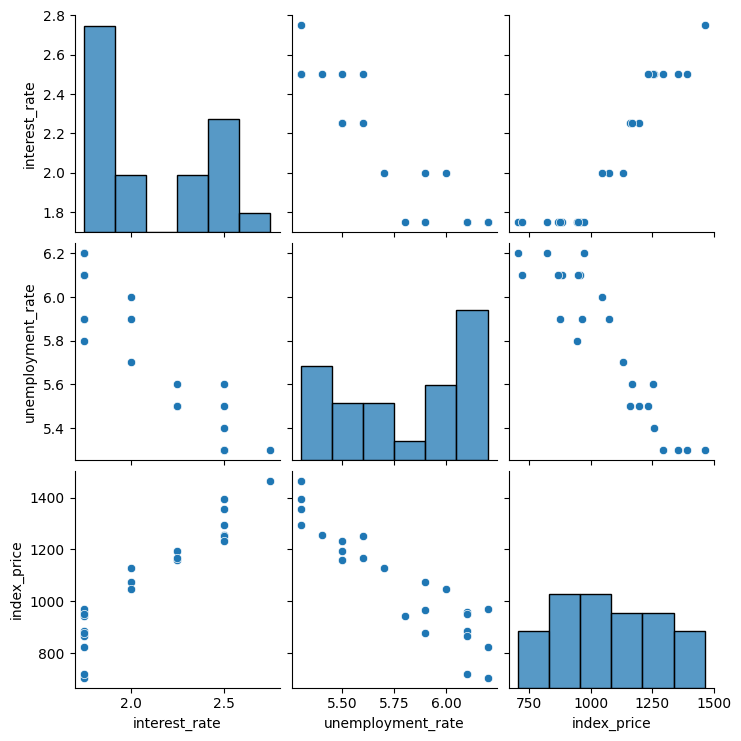

In [10]:
## visualization
import seaborn as sns
sns.pairplot(df_indx)

In [12]:
df_indx.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

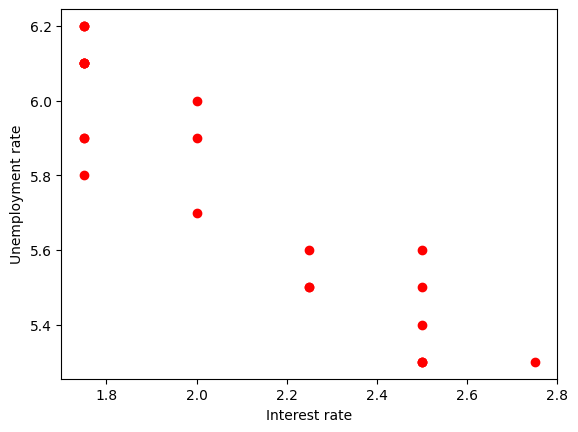

In [15]:
plt.scatter(df_indx['interest_rate'], df_indx['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [18]:
#independent and dependent features

X= df_indx[['interest_rate', 'unemployment_rate']]
y = df_indx['index_price']

## OR we can also do it like this

X = df_indx.iloc[:, :-1]
y = df_indx.iloc[:,-1]

In [20]:
X.head(), y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [29]:
#Using seaborn.regplot() to creating a Visualization of Regression plot which only works for two features.
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

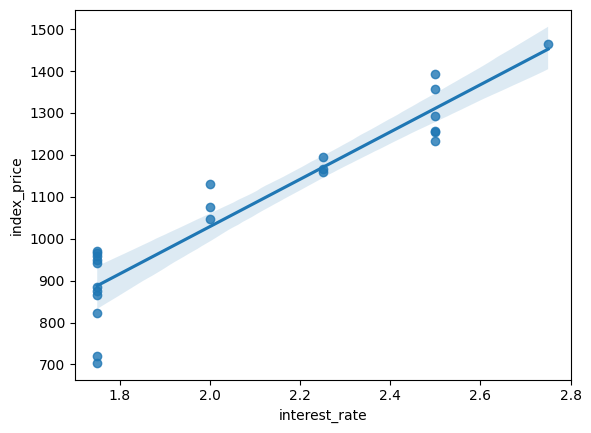

In [30]:
sns.regplot(x = df_indx['interest_rate'],y =df_indx['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

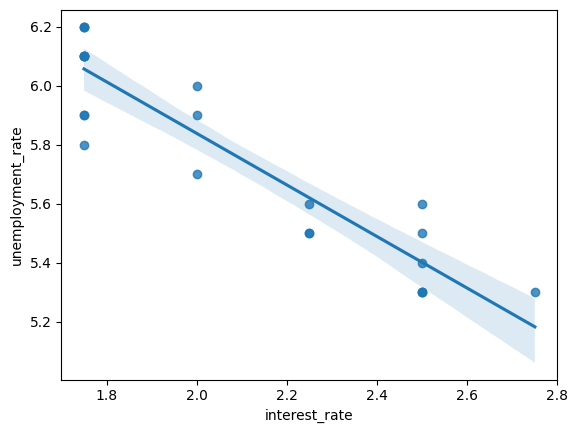

In [31]:
sns.regplot(x = df_indx['interest_rate'],y =df_indx['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

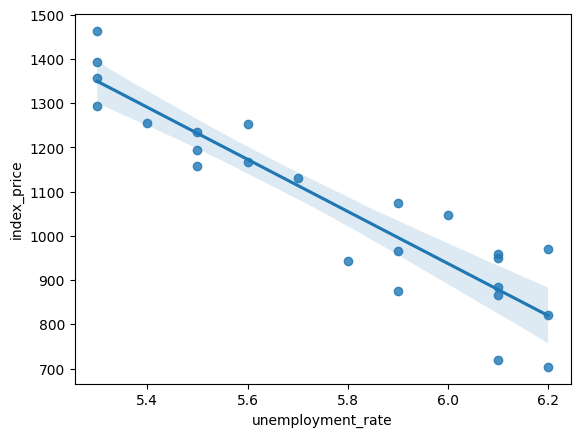

In [32]:
sns.regplot(x = df_indx['unemployment_rate'],y =df_indx['index_price'])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [37]:
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
#Cross Validataion
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',
                                   cv=3)

In [42]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [43]:
## prediction
y_pred = regression.predict(X_test)

In [44]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [45]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [47]:
# Rsquared and Adjusted Rsquared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
#display adjusted R-squared
print(1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

0.7591371539010257
0.5985619231683761


## Assumptions



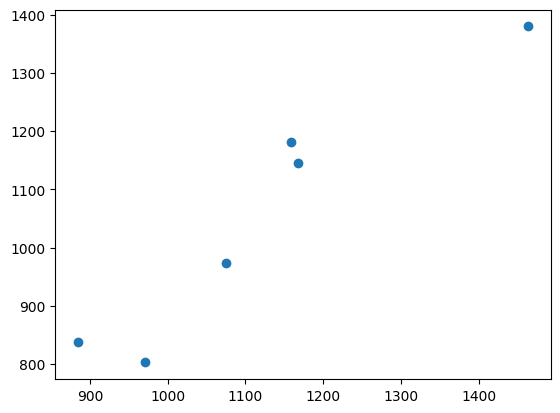

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


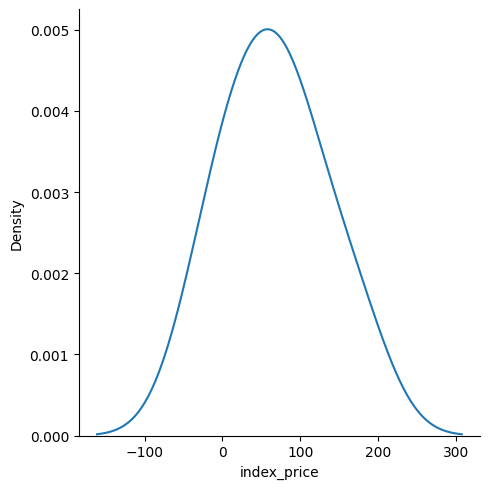

In [50]:
sns.displot(residuals, kind='kde')

#### When you have this kind of distribution, it means the model you are creating is good.

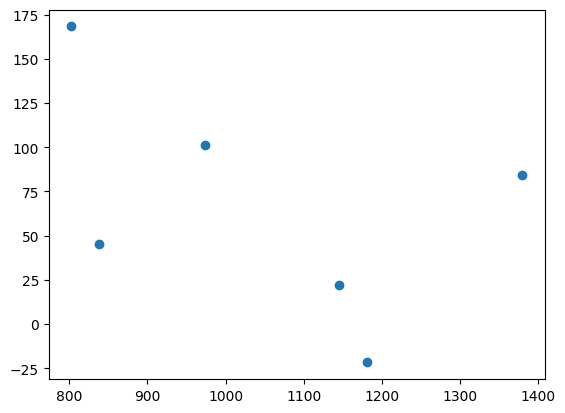

In [51]:
## scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

 #### When there's a uniform distribution like this, it means the model is working fine.